<a href="https://colab.research.google.com/github/demirtugbilal/brain-tumour-detection/blob/main/muhtas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os
import cv2
import PIL
import random
import matplotlib.pyplot as plt
from pathlib import Path
from google.colab.patches import cv2_imshow

In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.1.0+cu118 (Tesla T4)


In [3]:
!unzip -q /content/drive/MyDrive/braintumour.zip -d ../

In [4]:
%pip install -q wandb
import wandb
wandb.login()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 29.4 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

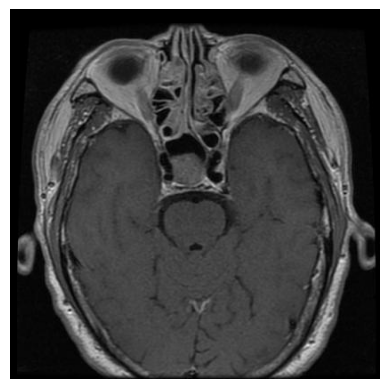

In [5]:
import cv2
from matplotlib import pyplot as plt

# Resmi aç
image_path = '/content/braintumour/train/images/1025_png.rf.a4159e055197b3f80da1336901e11a1f.jpg'
image = cv2.imread(image_path)

# Resmi göster
if image is not None:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV varsayılan olarak BGR formatında açar, bu yüzden RGB'ye dönüştürüyoruz
    plt.imshow(image)
    plt.axis('off')  # Eksenleri kapat
    plt.show()
else:
    print("Resim yüklenemedi.")

In [9]:
!python train.py --img 416 --batch 16 --epochs 500 --data /content/yolov5/coco128.yaml --weights yolov5x.pt --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2023-11-26 11:14:12.935357: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 11:14:12.935408: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 11:14:12.935445: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Currently logged in as: demirtugbilal (bilaldemirtug). Use `wandb login --relogin` to force relogin
train: weights=yolov5x.pt, cfg=, data=/content/yolov5/coco128.yaml, hyp=data/hyps/hyp.scratch-

In [11]:
!python "/content/yolov5/detect.py" --source "/content/braintumour/valid/images" --img 416 --weights "/content/yolov5/runs/train/exp3/weights/best.pt" --conf 0.5

detect: weights=['/content/yolov5/runs/train/exp3/weights/best.pt'], source=/content/braintumour/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 322 layers, 86180143 parameters, 0 gradients, 203.8 GFLOPs
image 1/306 /content/braintumour/valid/images/1013_png.rf.a786fff7149373e20219c456a81d973e.jpg: 416x416 1 Benign, 45.6ms
image 2/306 /content/braintumour/valid/images/1016_png.rf.682927171d961da97f4e4dd402b8eaaa.jpg: 416x416 1 Benign, 39.8ms
image 3/306 /content/braintumour/valid/images/1019_png.r

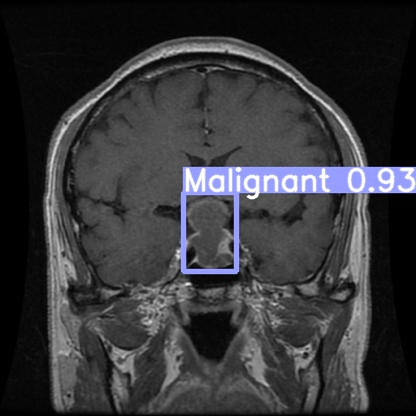

In [15]:
DATA_DIR = Path('/content/yolov5/runs/detect/exp2')
img_list = list(DATA_DIR.glob('*.jpg'))
pickone = random.choice(img_list)

# Resmi OpenCV ile açma
img = cv2.imread(str(pickone))

# OpenCV BGR formatından RGB formatına dönüştürme
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resmi gösterme
cv2_imshow(img)

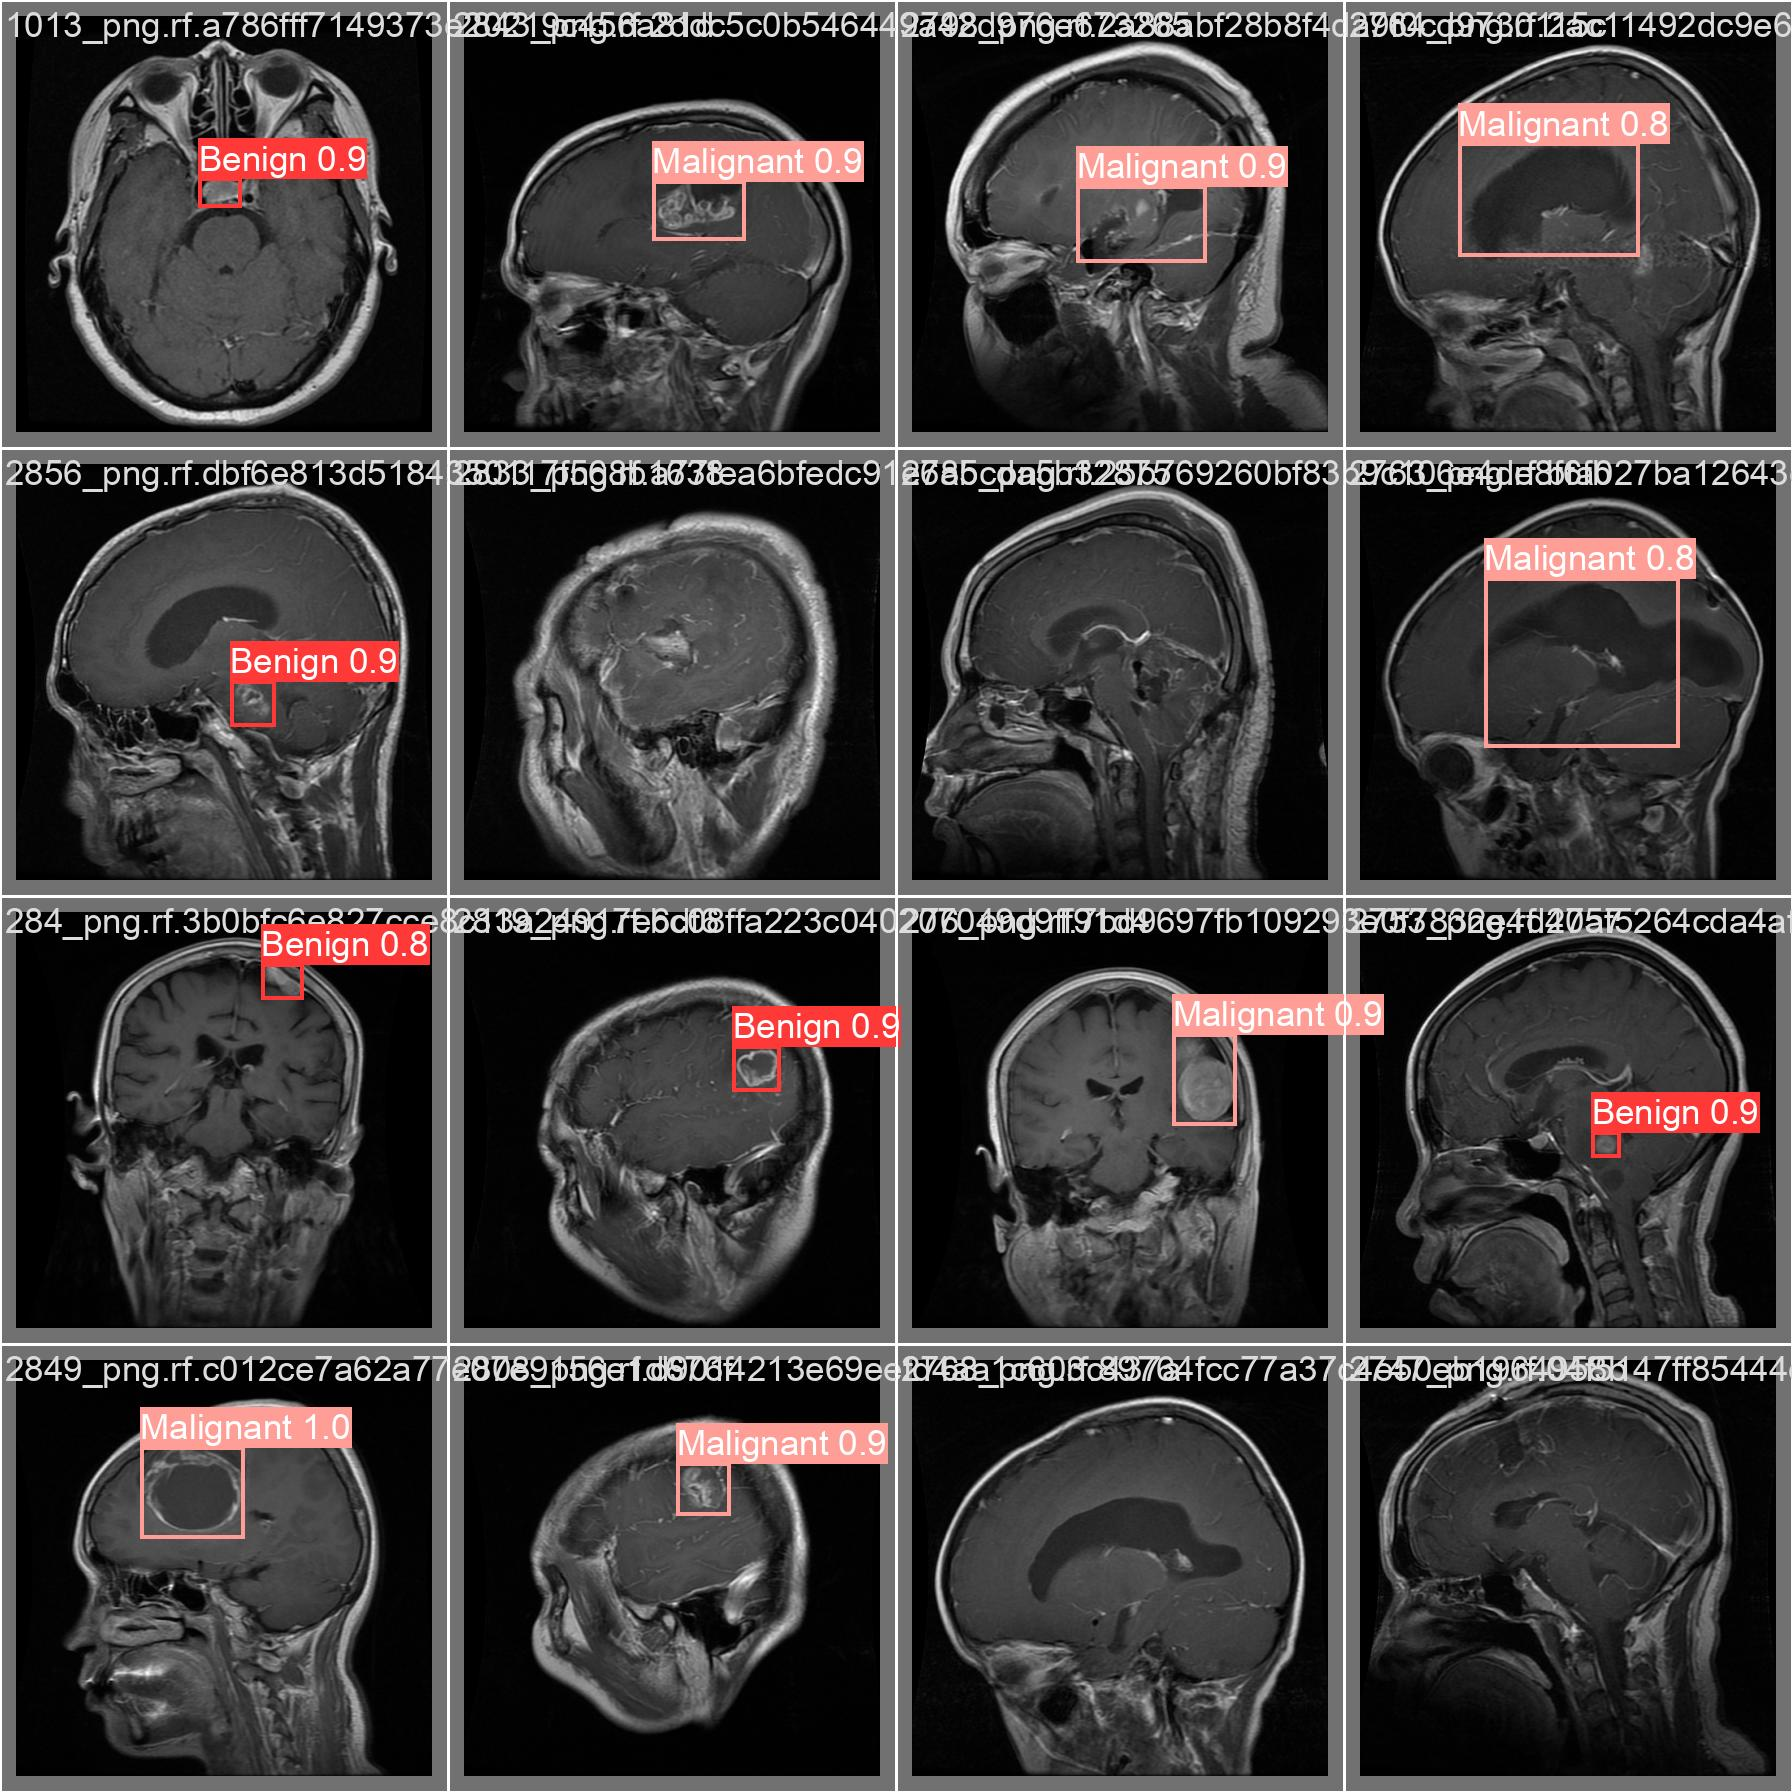

In [17]:
Image(filename='/content/yolov5/runs/train/exp3/val_batch0_pred.jpg', width=800)

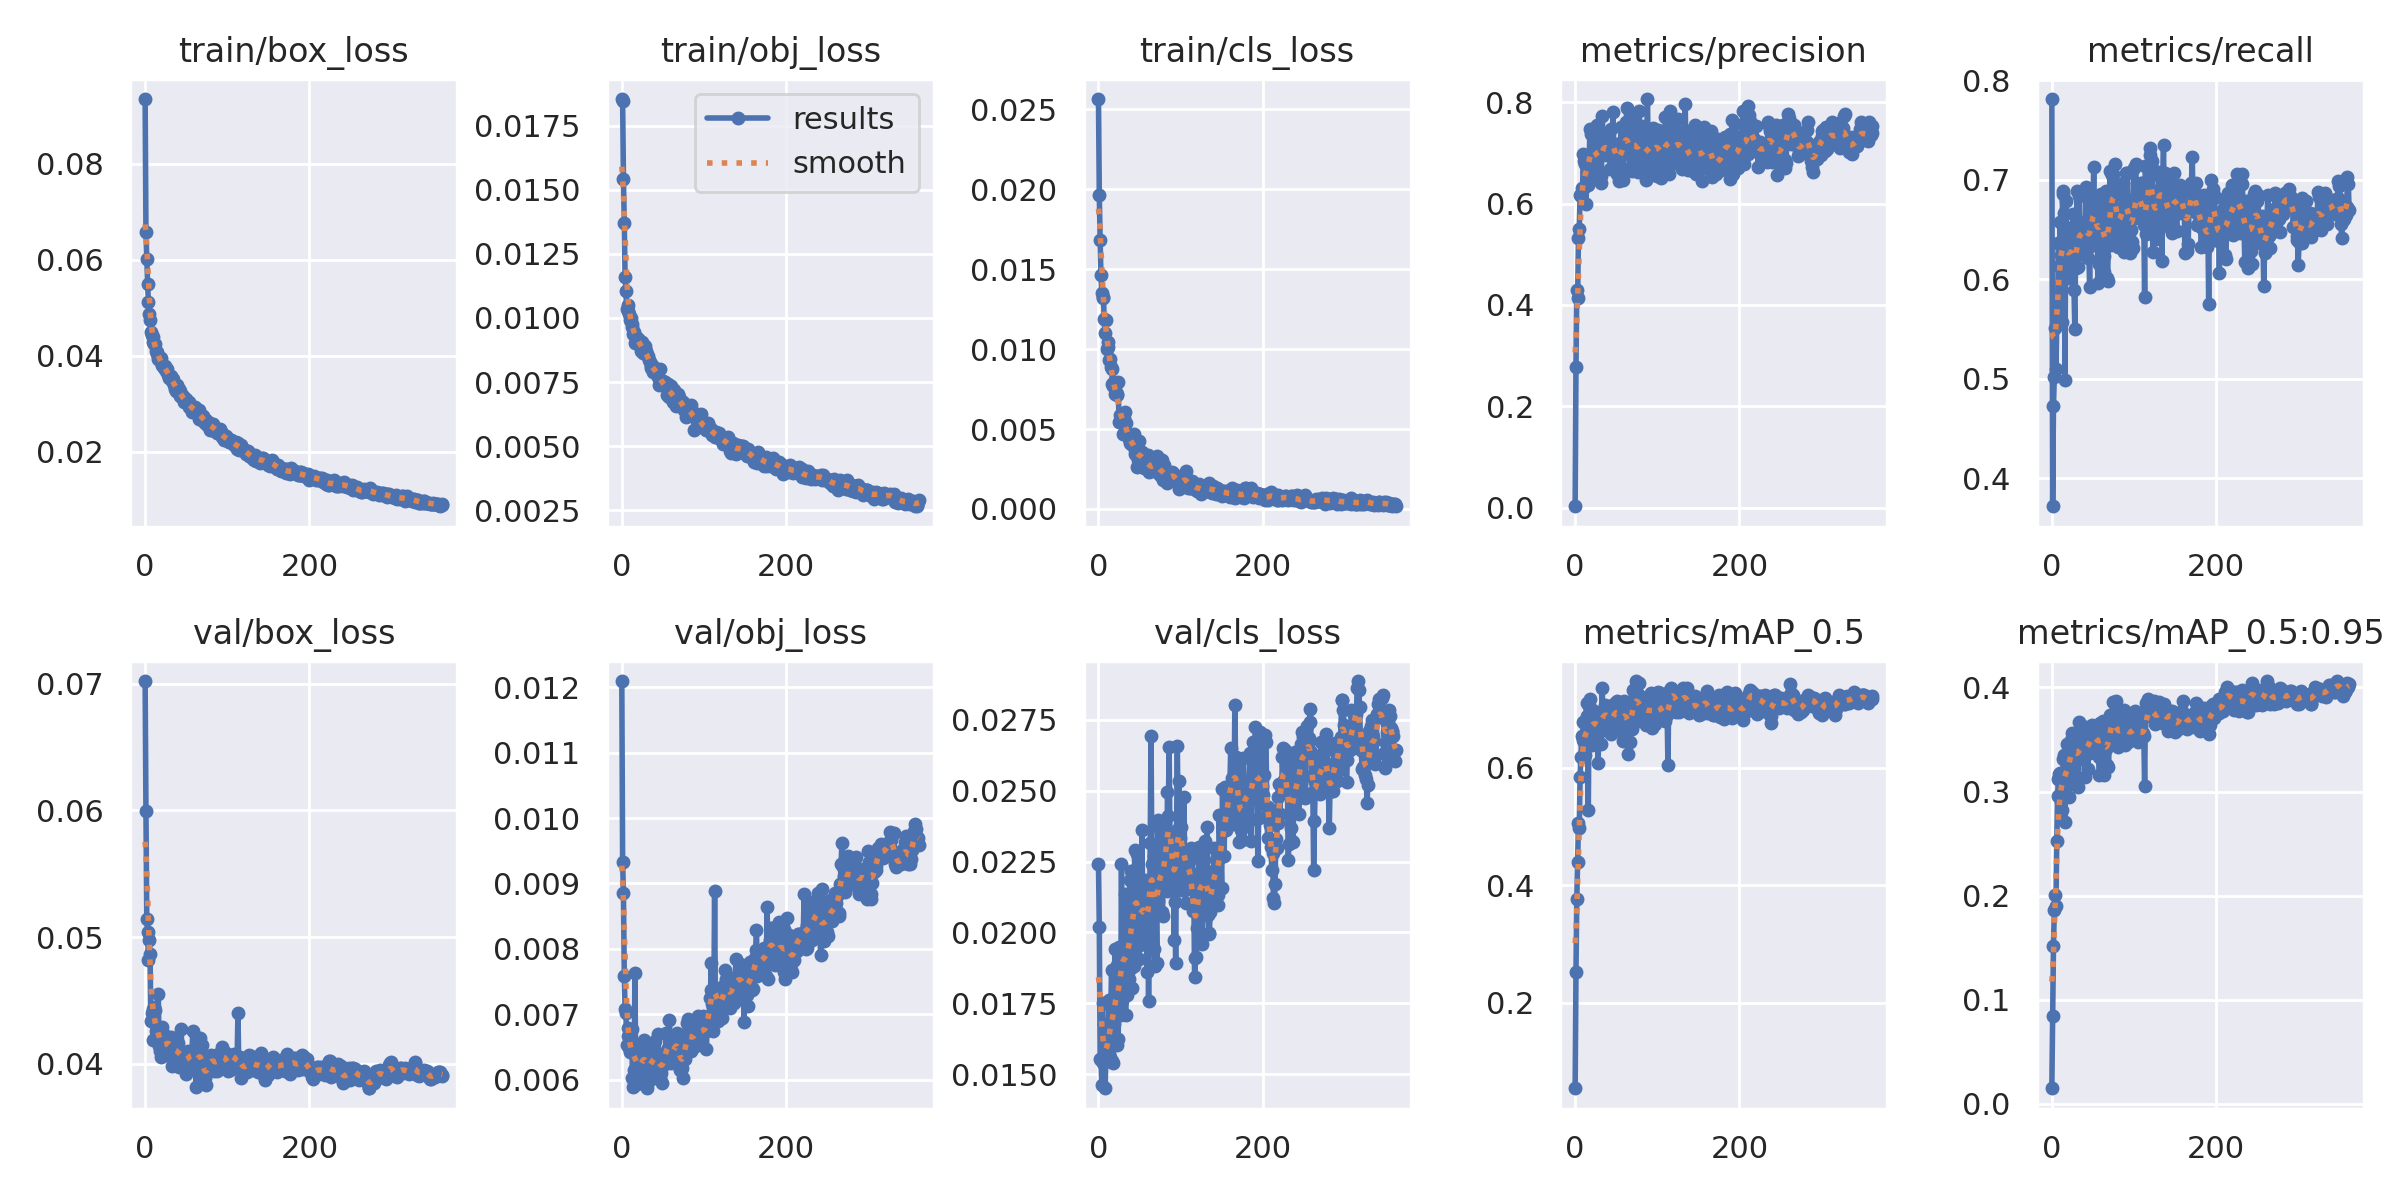

In [18]:
Image(filename='/content/yolov5/runs/train/exp3/results.png', width=800)

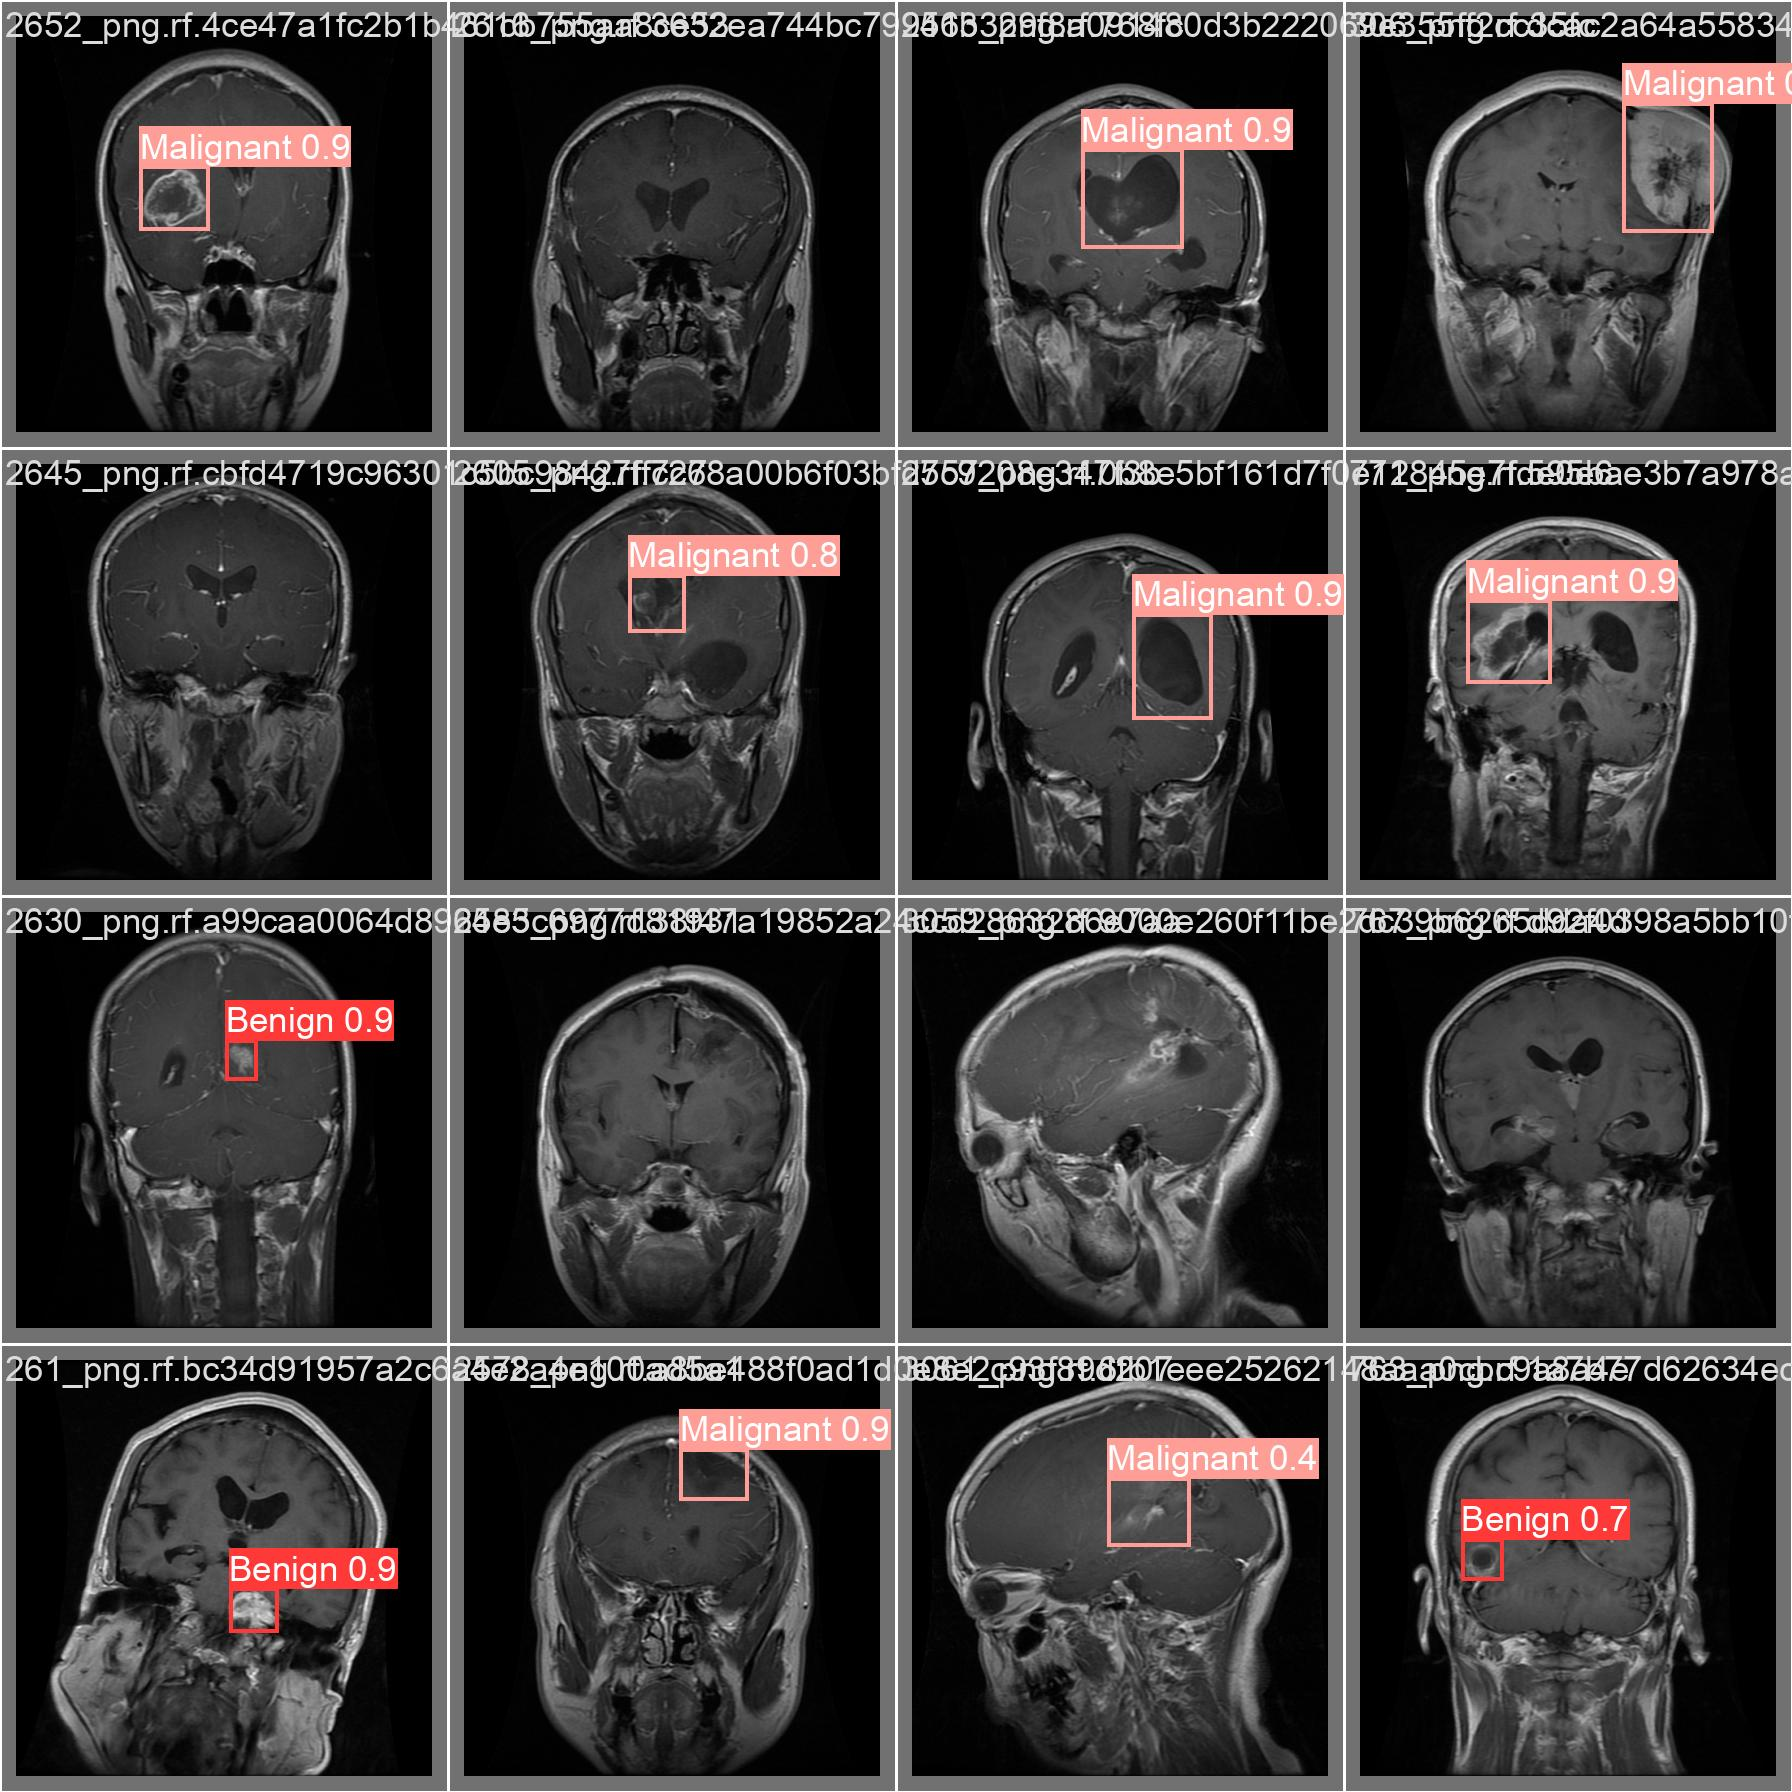

In [19]:
Image(filename='/content/yolov5/runs/train/exp3/val_batch2_pred.jpg', width=800)